<a href="https://colab.research.google.com/github/shrinkhal14/QR_Auth./blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



# Define paths to dataset
first_prints_path = "/content/drive/MyDrive/dataset/first"
second_prints_path = "/content/drive/MyDrive/dataset/second"

# Function to load images and preprocess
def load_images(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
        if img is not None:
            img = cv2.resize(img, (256, 256))  # Resize
            img = img / 255.0  # Normalize
            images.append(img)
            labels.append(label)
    return images, labels

# Load both classes
first_images, first_labels = load_images(first_prints_path, label=0)
second_images, second_labels = load_images(second_prints_path, label=1)

# Combine dataset
images = np.array(first_images + second_images).reshape(-1, 256, 256, 1)
labels = np.array(first_labels + second_labels)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")


Training Data: (168, 256, 256, 1), Testing Data: (42, 256, 256, 1)


In [4]:
# CNN Model Architecture
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary Classification
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,838,529 (56.60 MB)

 Trainable params: 14,838,529 (56.60 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=16)


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.5748 - loss: 1.6390 - val_accuracy: 0.4286 - val_loss: 0.6639
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5566 - loss: 0.6733 - val_accuracy: 0.5952 - val_loss: 0.6277
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6684 - loss: 0.5983 - val_accuracy: 0.9048 - val_loss: 0.3975
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9299 - loss: 0.3305 - val_accuracy: 0.4286 - val_loss: 0.7475
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.8016 - loss: 0.3463 - val_accuracy: 0.9048 - val_loss: 0.1677
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.8963 - loss: 0.1861 - val_accuracy: 0.9524 - val_loss: 0.1042
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.9659 - loss: 0.1172 - val_accuracy: 0.9762 - val_loss: 0.0585
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 1.0000 - loss: 0.0457 - val_accuracy: 0.9762 - val_loss:

In [6]:
# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Save Model
model.save("/content/drive/MyDrive/dataset/models/qr_code_cnn.h5")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 344ms/step - accuracy: 1.0000 - loss: 0.0215


Test Accuracy: 1.0000


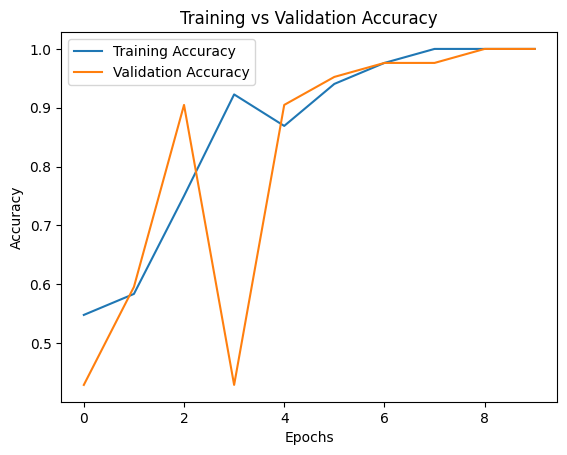

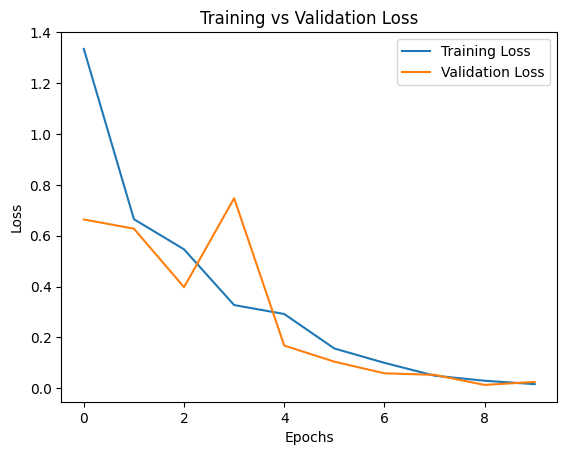

In [7]:
import matplotlib.pyplot as plt

# Plot Training vs Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

# Plot Training vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 757ms/step


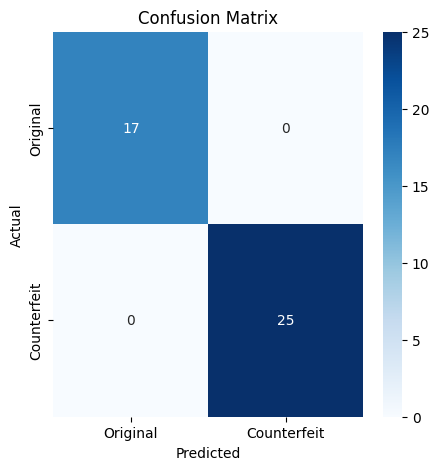

In [8]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict labels for test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Original', 'Counterfeit'], yticklabels=['Original', 'Counterfeit'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [10]:
def predict_qr(image_path, model):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (256, 256)) / 255.0
    img = img.reshape(1, 256, 256, 1)  # Reshape for model

    prediction = model.predict(img)[0][0]

    if prediction > 0.5:
        print("⚠️ Counterfeit QR Code Detected!")
    else:
        print("✅ QR Code is Original.")

# Example Usage
test_image_path = "/content/drive/MyDrive/dataset/images.png"
predict_qr(test_image_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
⚠️ Counterfeit QR Code Detected!


In [18]:
!git clone https://github.com/shrinkhal14/QR_Auth..git


Cloning into 'QR_Auth.'...
